In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [21]:
path = '~/Desktop/CareerFoundry/3.1./'
climate = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-weather-prediction-dataset-processed.csv'))
pleasant = pd.read_csv(os.path.join(path, 'Data/Original/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [22]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [23]:
climate_2022 = climate[climate['DATE'].astype(str).str[:4] == '2022']
climate_2022.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22646,20220101,1,6,2.1,0.86,1.0282,0.62,0.00,0,4.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22647,20220102,1,5,2.1,0.81,1.0237,0.40,0.00,0,1.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22648,20220103,1,8,2.1,0.66,1.0189,0.24,0.10,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22649,20220104,1,8,2.1,0.71,1.0030,0.22,0.86,0,0.0,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22650,20220105,1,4,2.1,0.73,1.0130,0.53,0.02,0,3.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [24]:
columns = climate_2022.columns.drop('DATE', 'MONTH')
climate_2022[columns] = StandardScaler().fit_transform(climate_2022[columns])
climate_2022.head()

/var/folders/93/6z_l2dr50933__g0037dd2540000gr/T/ipykernel_49538/629781025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_2022[columns] = StandardScaler().fit_transform(climate_2022[columns])


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22646,20220101,-1.576556,0.541740,0.0,1.303146,1.190690,-1.252773,-0.393572,-0.077177,-0.419756,...,0.0,-1.110223e-16,-2.220446e-16,2.220446e-16,-5.551115e-17,0.0,0.0,-1.776357e-15,8.881784e-16,0.0
22647,20220102,-1.576556,0.141037,0.0,0.943461,0.582746,-1.476738,-0.393572,-0.077177,-1.147343,...,0.0,-1.110223e-16,-2.220446e-16,2.220446e-16,-5.551115e-17,0.0,0.0,-1.776357e-15,8.881784e-16,0.0
22648,20220103,-1.576556,1.343146,0.0,-0.135592,-0.065727,-1.639622,-0.219643,-0.077177,-1.425537,...,0.0,-1.110223e-16,-2.220446e-16,2.220446e-16,-5.551115e-17,0.0,0.0,-1.776357e-15,8.881784e-16,0.0
22649,20220104,-1.576556,1.343146,0.0,0.224093,-2.213796,-1.659983,1.102219,-0.077177,-1.425537,...,0.0,-1.110223e-16,-2.220446e-16,2.220446e-16,-5.551115e-17,0.0,0.0,-1.776357e-15,8.881784e-16,0.0
22650,20220105,-1.576556,-0.259666,0.0,0.367966,-0.862809,-1.344395,-0.358786,-0.077177,-0.655152,...,0.0,-1.110223e-16,-2.220446e-16,2.220446e-16,-5.551115e-17,0.0,0.0,-1.776357e-15,8.881784e-16,0.0


Hierarchical Clustering Single Method

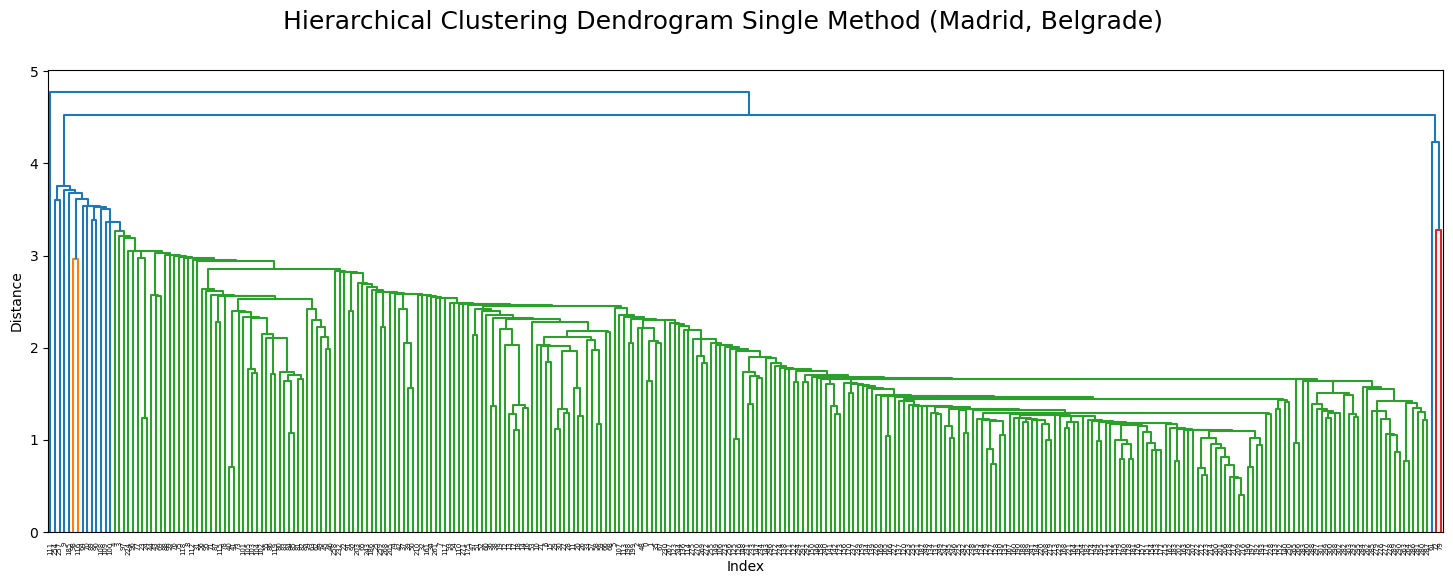

In [36]:
#Compare only Madrid and Belgrade in 2010 - single method

distance = linkage(climate_2022.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering Dendrogram Single Method (Madrid, Belgrade)",fontsize=18)
plt.show()

Hierarchical Clustering Complete Method

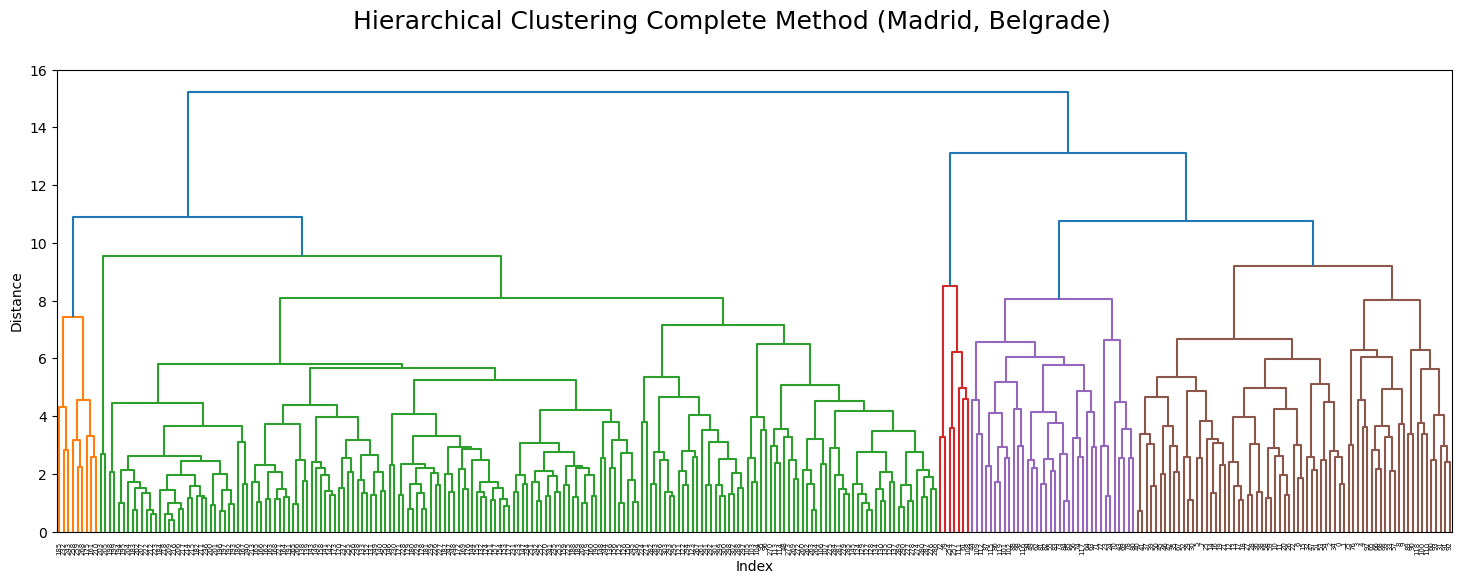

In [37]:
distance = linkage(climate_2022.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering Complete Method (Madrid, Belgrade)",fontsize=18)
plt.show()

Hierarchical Clustering Average Method

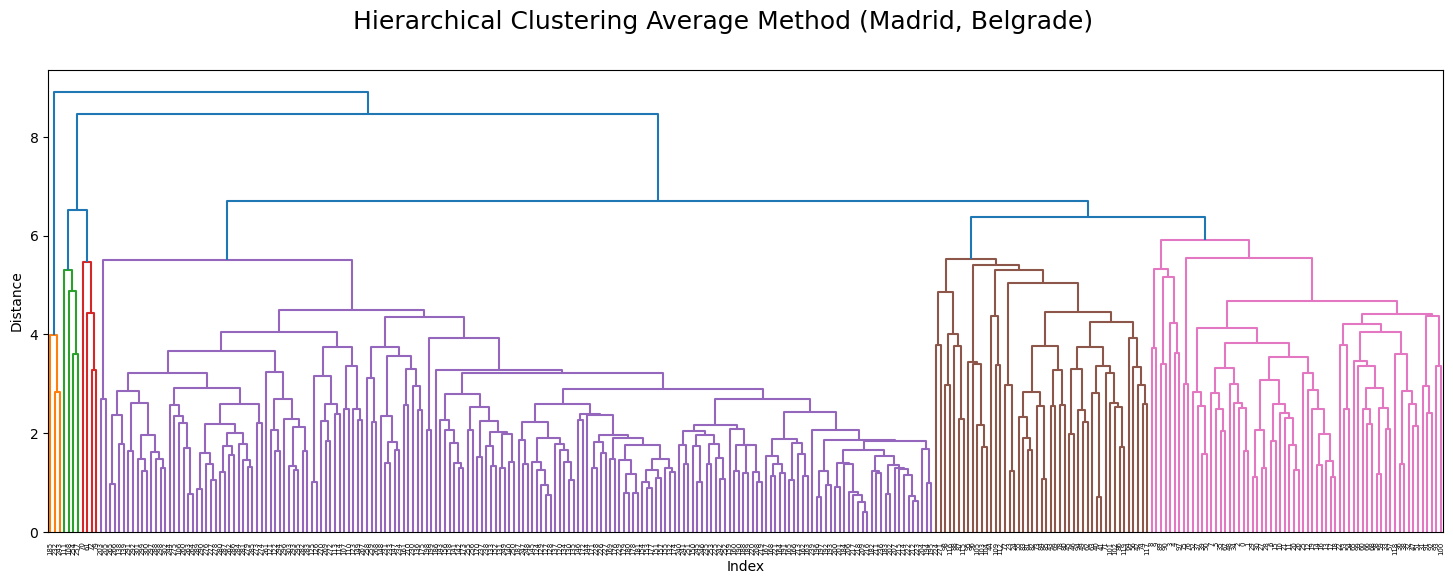

In [38]:
#Comparing only Madrid and Belgrade 2010 - average method

distance = linkage(climate_2022.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
  'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering Average Method (Madrid, Belgrade)",fontsize=18)
plt.show()

Hierarchical Clustering Ward Method

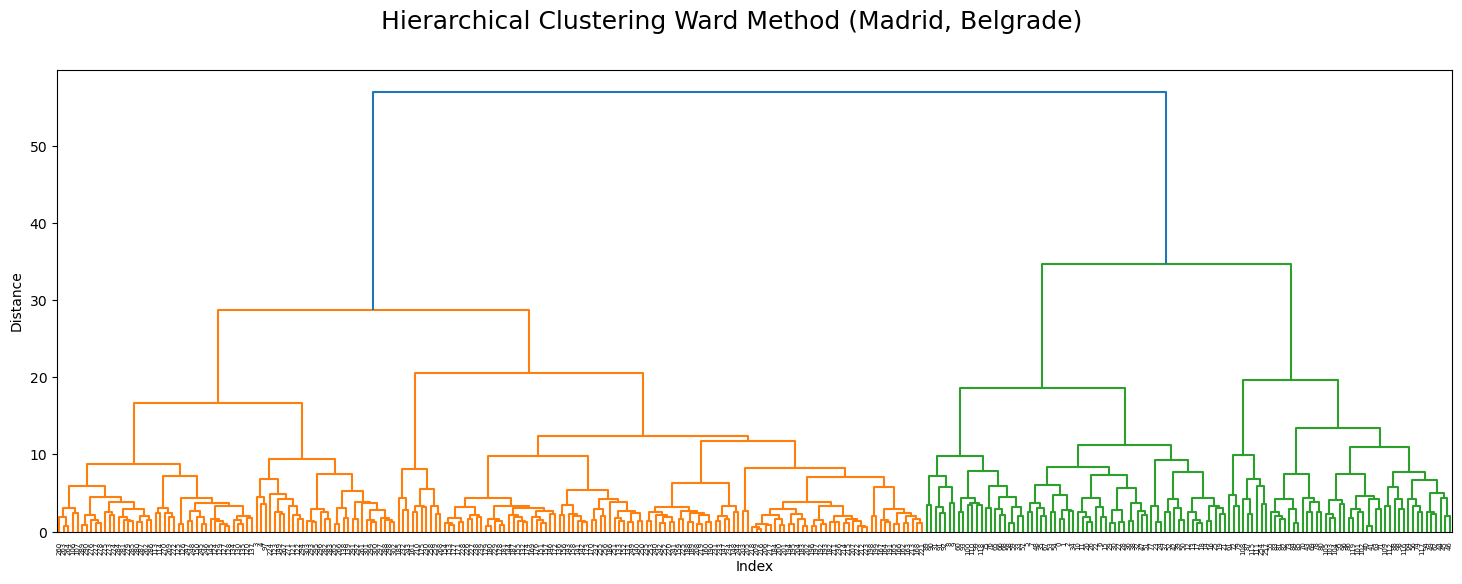

In [39]:
distance = linkage(climate_2022.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
  'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Hierarchical Clustering Ward Method (Madrid, Belgrade)",fontsize=18)
plt.show()

Hierarchical Clustering Single Method ALL Stations

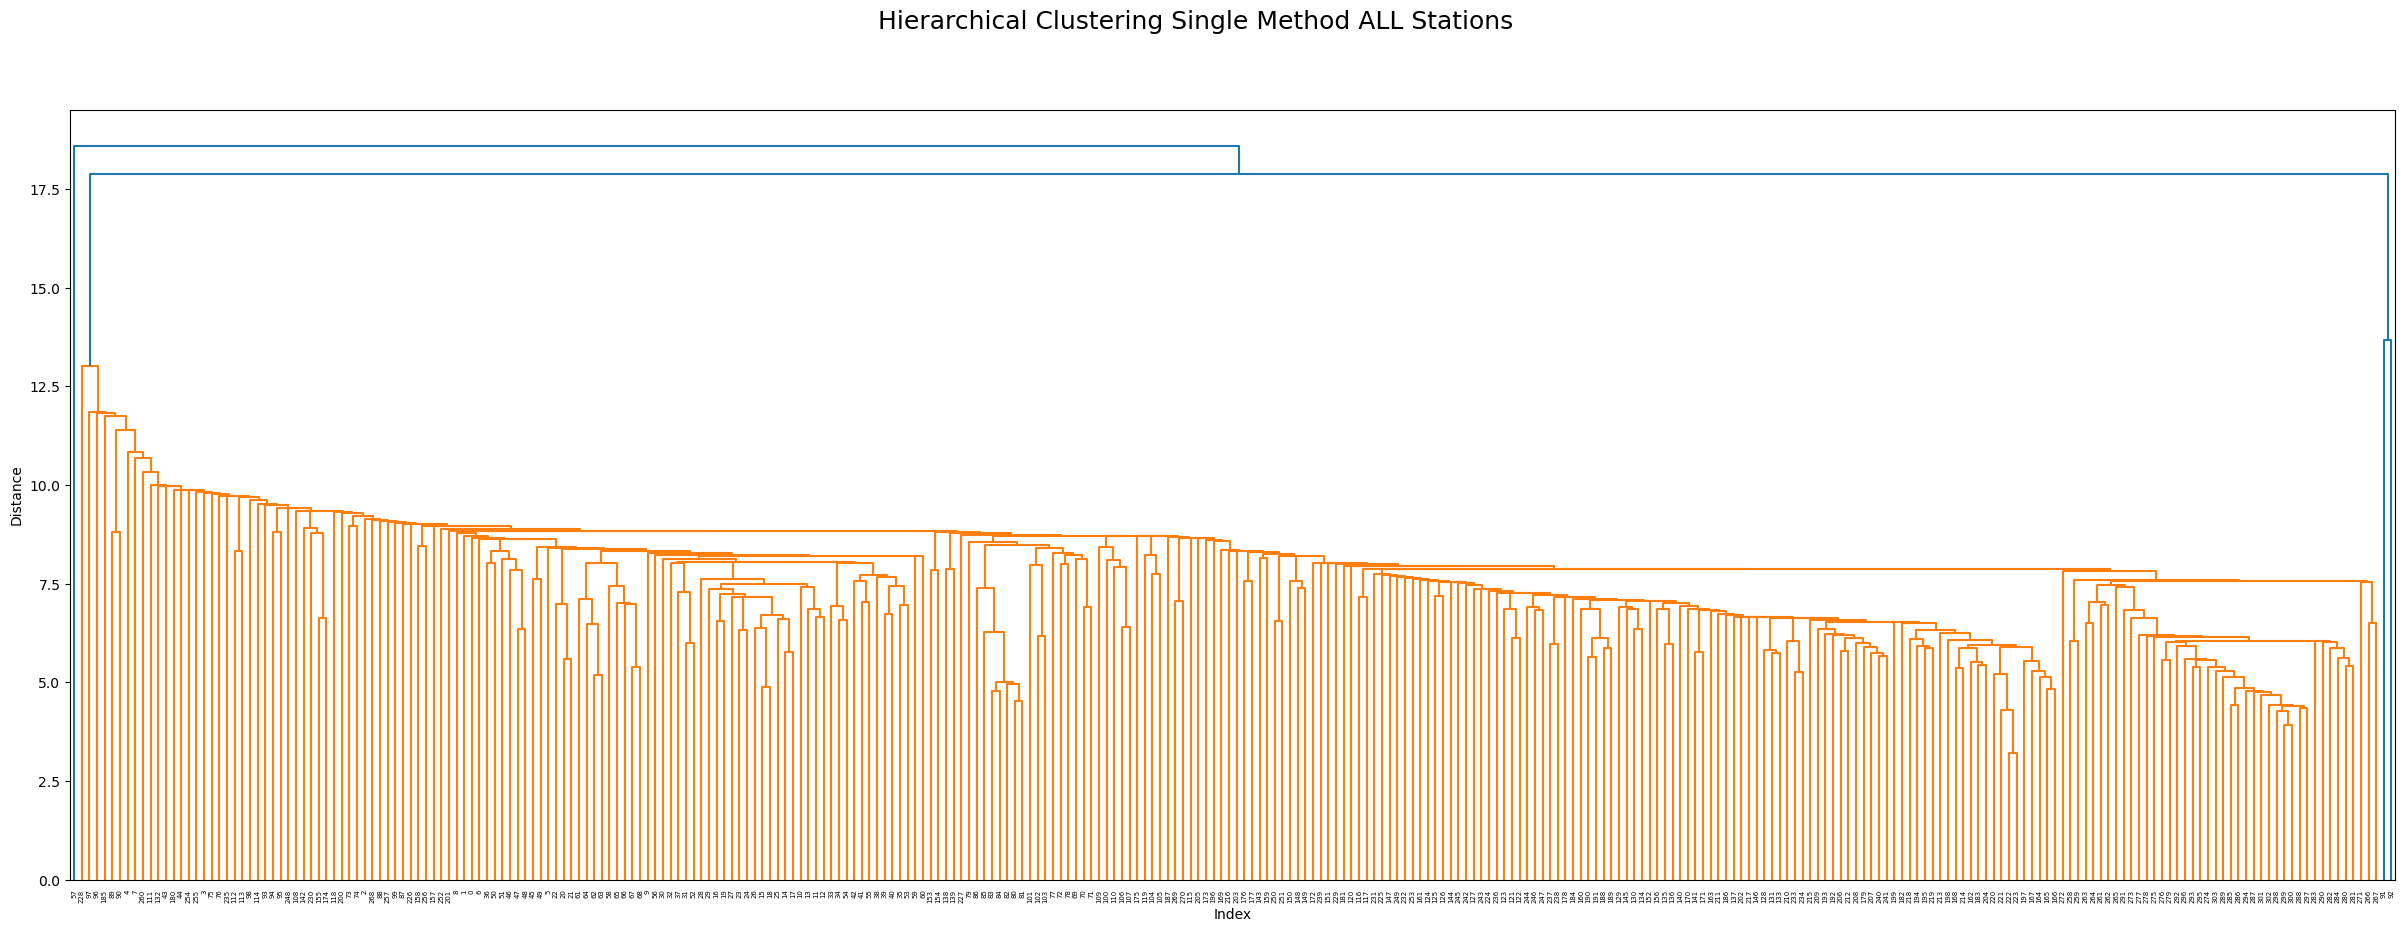

In [25]:
distance = linkage(
    climate_2022[columns],
    method='single'
)
plt.figure(figsize=(30,10))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Hierarchical Clustering Single Method ALL Stations', fontsize=18)
plt.show()

Hierarchical Clustering Complete Method ALL Stations

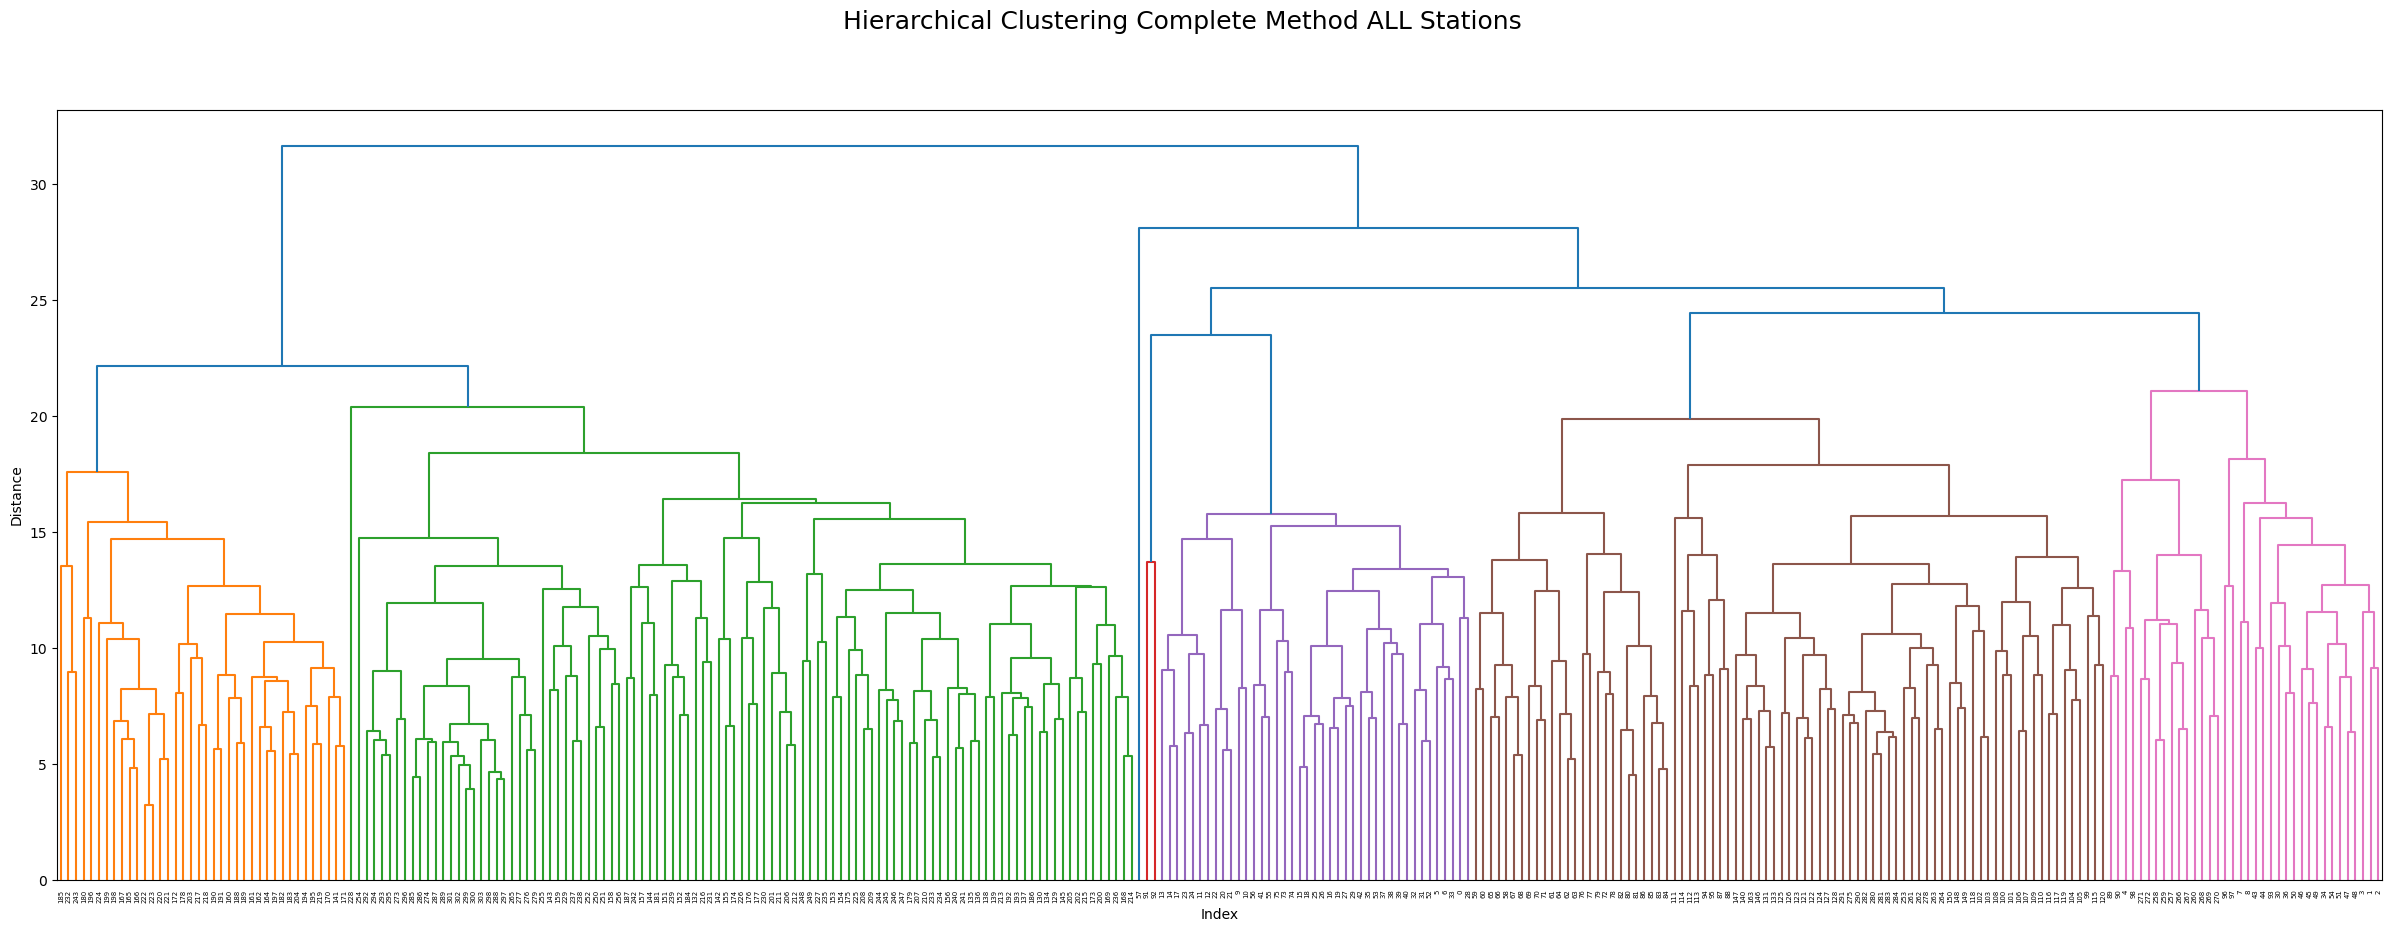

In [26]:
distance = linkage(
    climate_2022[columns],
    method='complete'
)
plt.figure(figsize=(30,10))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Hierarchical Clustering Complete Method ALL Stations', fontsize=18)
plt.show()

Hierarchical Clustering Average Method ALL Stations

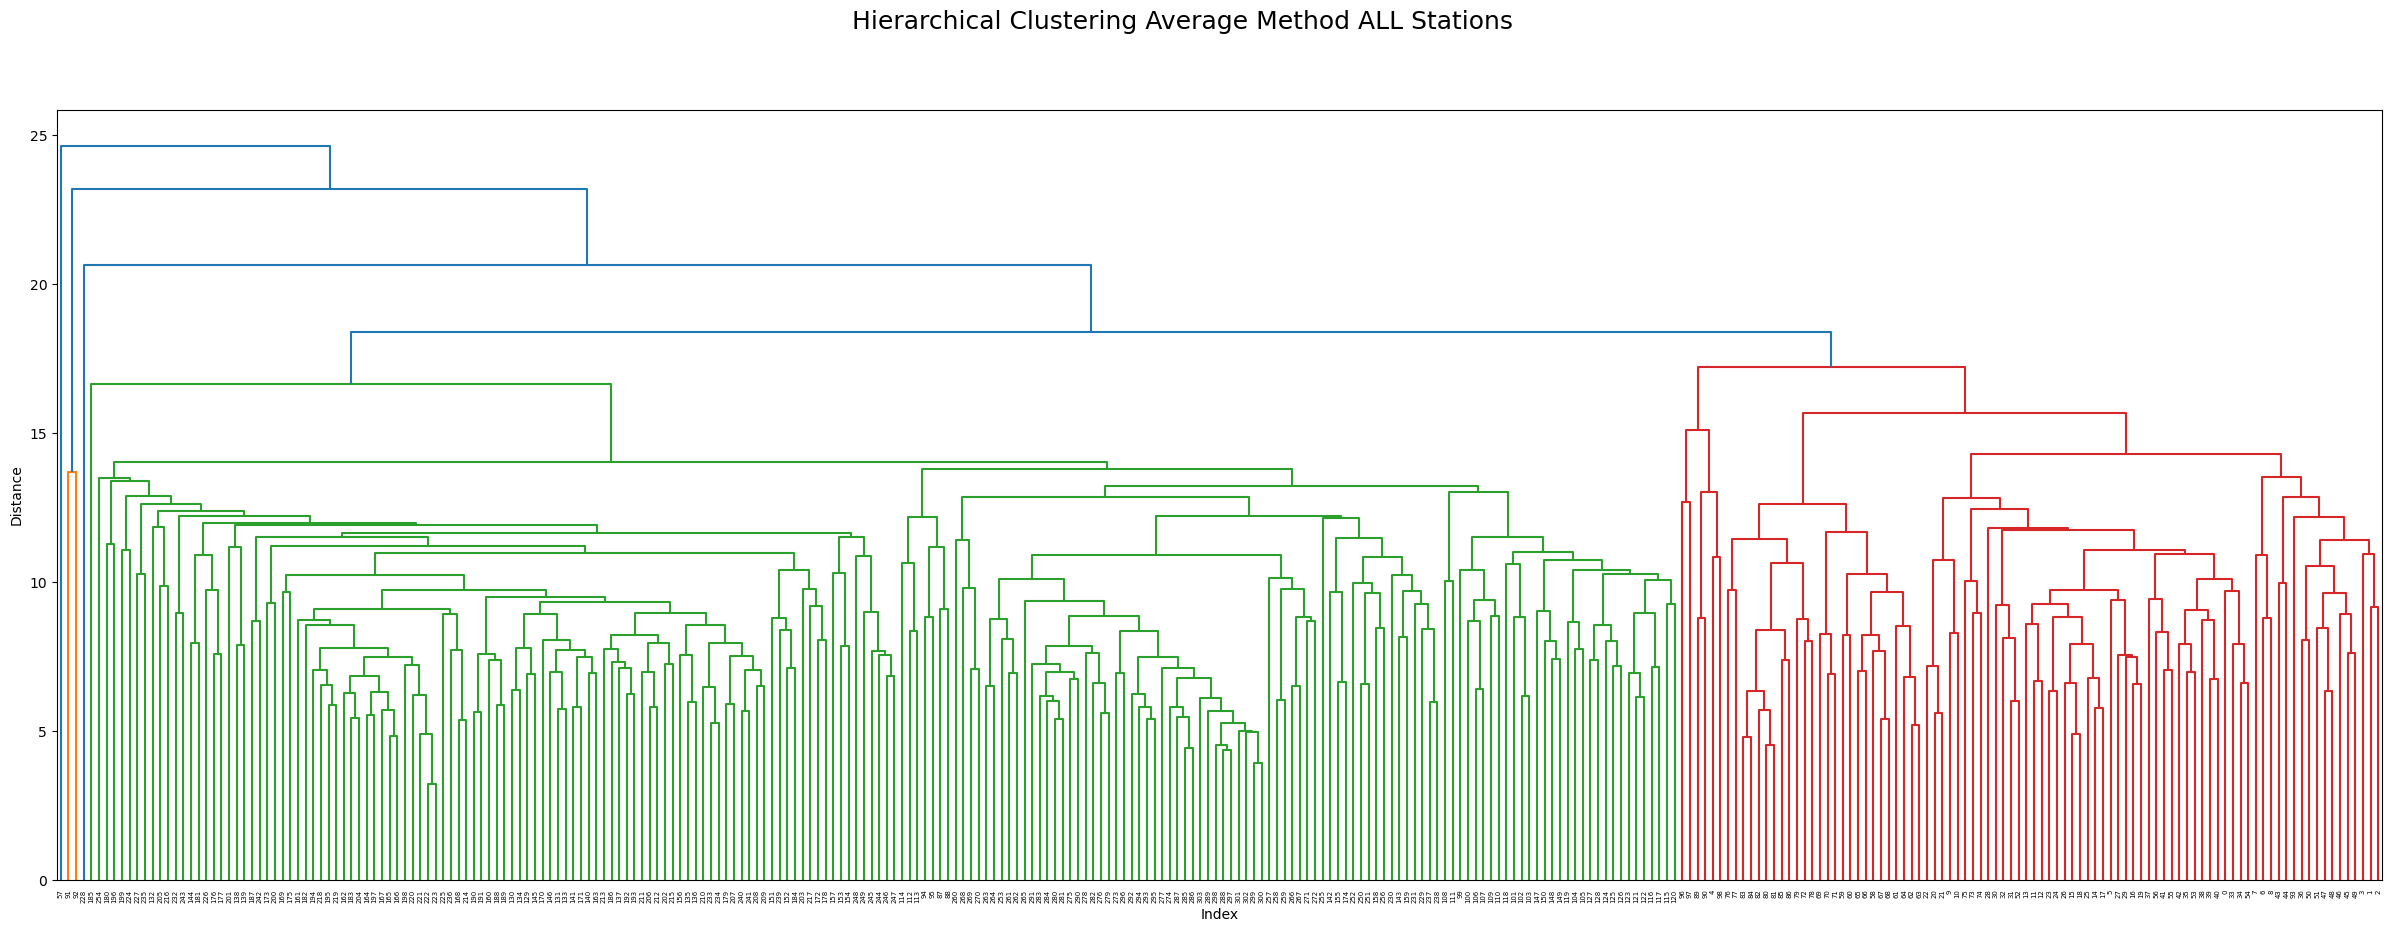

In [27]:
distance = linkage(
    climate_2022[columns],
    method='average'
)
plt.figure(figsize=(30,10))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Hierarchical Clustering Average Method ALL Stations', fontsize=18)
plt.show()

Hierarchical Clustering Ward Method ALL Stations

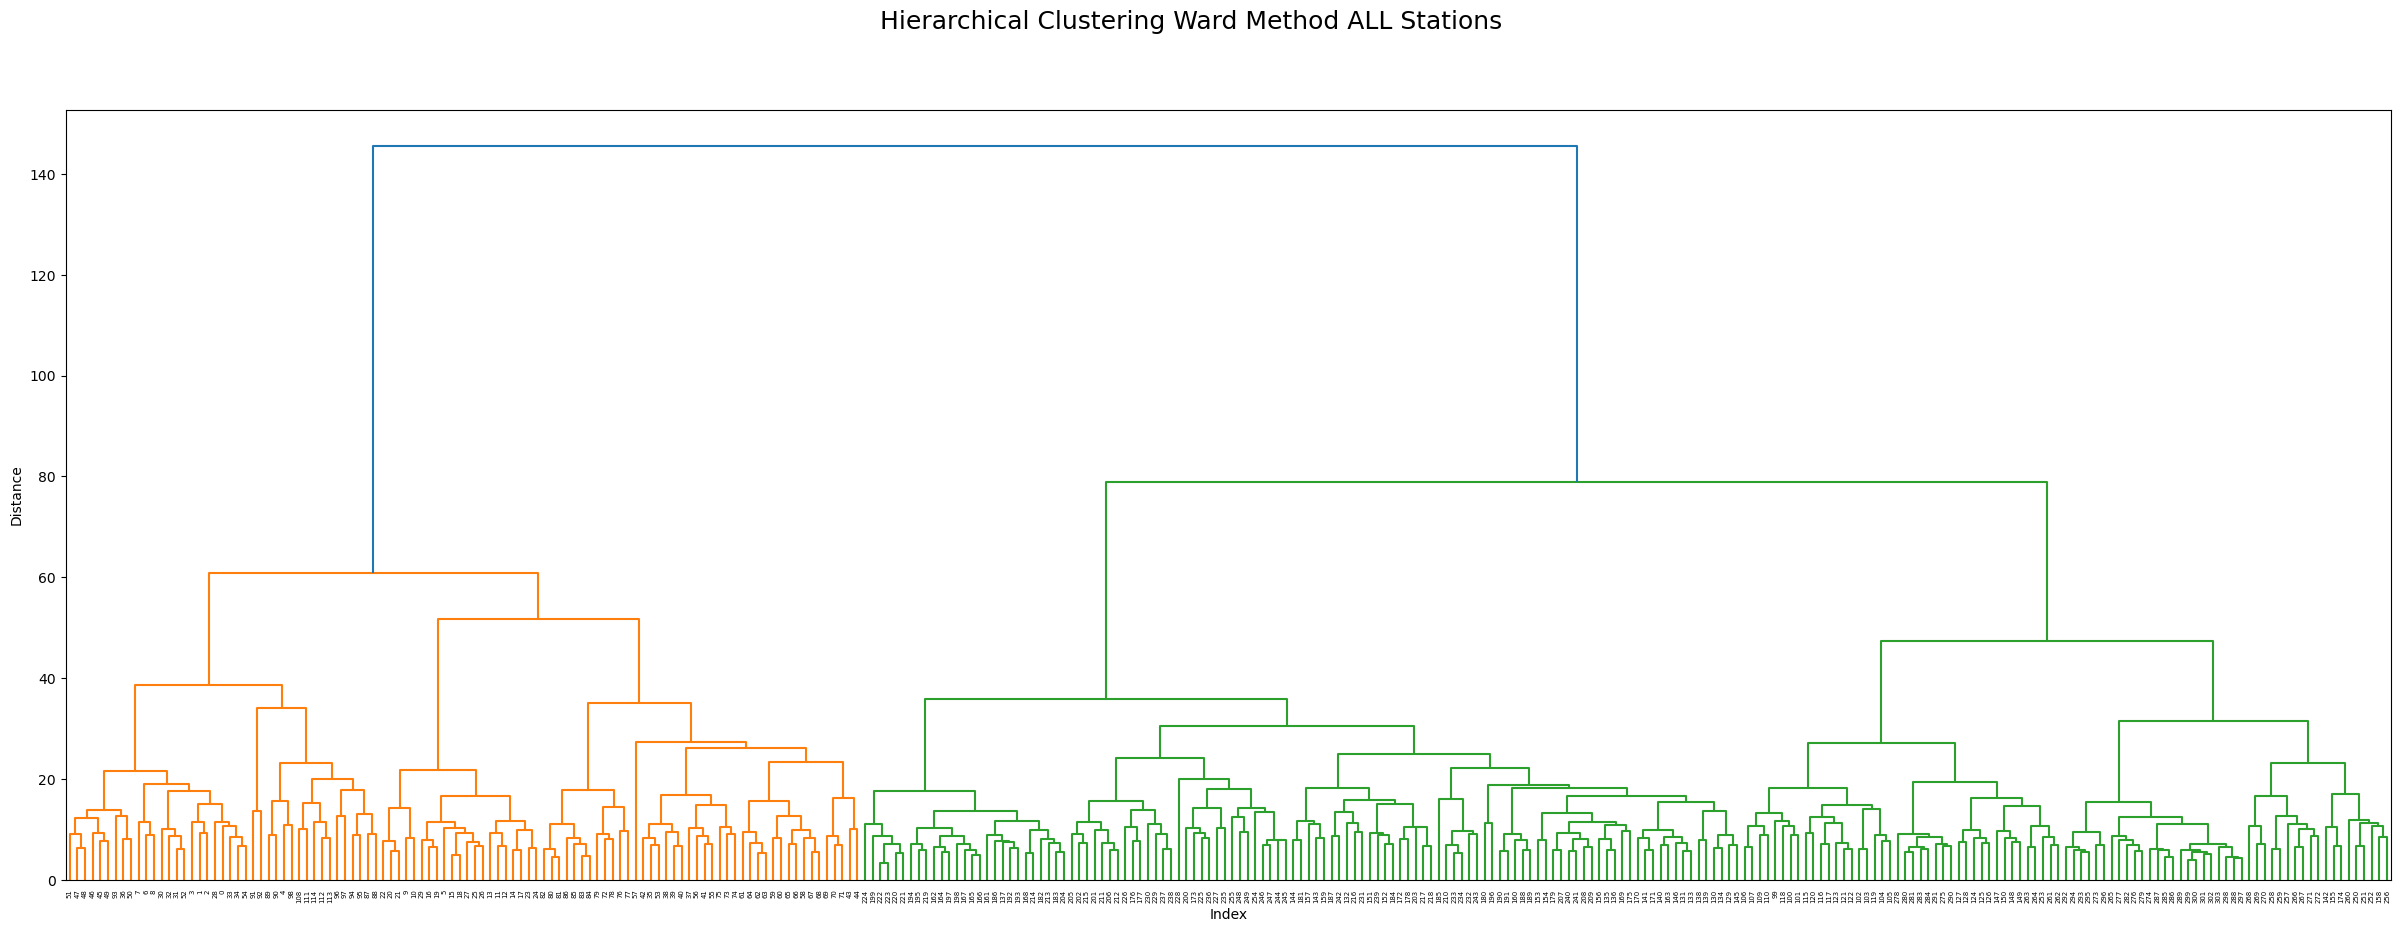

In [28]:
distance = linkage(
    climate_2022[columns],
    method='ward'
)
plt.figure(figsize=(30,10))
dendrogram(distance, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Hierarchical Clustering Ward Method ALL Stations', fontsize=18)
plt.show()

Principal Components Analysis

In [29]:
pca = PCA(n_components=9)
principal_components = pca.fit_transform(climate_2022)

In [30]:
principal_components

array([[-4.67387043e+02, -1.64536745e+00, -2.25360258e+00, ...,
         2.54512450e+00, -2.74390857e+00, -4.83767909e-01],
       [-4.66385094e+02, -2.53800828e+00, -5.84353912e+00, ...,
        -6.37510243e-01, -1.53918623e+00, -7.07970885e-01],
       [-4.65380635e+02, -3.04500319e+00, -7.36049714e+00, ...,
        -5.71478339e-03, -3.60812654e+00, -1.73339052e-02],
       ...,
       [ 4.60637512e+02, -6.36367623e+00,  1.99683411e+00, ...,
        -1.22699848e+00,  6.63400783e-01,  1.03111595e-01],
       [ 4.61611880e+02, -7.60023798e+00,  3.11763090e+00, ...,
        -1.72985549e-01, -1.33346811e-02,  8.19668838e-01],
       [ 4.62595648e+02, -9.40076748e+00,  2.34151015e+00, ...,
        -1.88223238e-01, -5.00240304e-01,  1.00292591e+00]],
      shape=(304, 9))

In [32]:
df_PCA = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])
df_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-467.387043,-1.645367,-2.253603,5.585545,-1.937457,-0.964366,2.545125,-2.743909,-0.483768
1,-466.385094,-2.538008,-5.843539,3.821132,-3.680502,-1.188464,-0.637510,-1.539186,-0.707971
2,-465.380635,-3.045003,-7.360497,1.787557,-2.720382,-0.587487,-0.005715,-3.608127,-0.017334
3,-464.392595,-4.084432,-8.307222,-1.918975,-1.979124,2.125370,1.733098,-2.728287,-0.648698
4,-463.444999,-4.956750,-5.149220,-3.556441,3.308842,-0.166174,-1.228532,-2.555157,-2.914814


In [35]:

df_PCA.to_csv(os.path.join(path, 'Data/Clean/PCA_climate_2022.csv'))